In [109]:
import torch
import torch.nn as nn
import torchvision.models as models
from thop import profile

import numpy as np

In [114]:
#alexnet = models.alexnet(pretrained=True)
vgg16 = models.vgg16(pretrained=True)


alexnet = torch.load("cifar10_net1.pt", map_location=torch.device('cpu'))
alexnet

OrderedDict([('features.0.weight',
              tensor([[[[ 5.4566e-02,  6.0158e-02,  4.7021e-02,  ..., -4.7910e-02,
                          1.1978e-02,  3.4456e-02],
                        [-1.2045e-02,  1.3906e-02, -3.3201e-02,  ..., -3.2394e-02,
                          4.6525e-02,  2.1130e-02],
                        [-9.4558e-03, -7.9360e-03, -1.7914e-02,  ..., -2.2070e-02,
                         -3.9383e-03,  4.8785e-02],
                        ...,
                        [-1.0091e-02, -3.1298e-02,  1.5792e-02,  ..., -1.3176e-02,
                          8.8266e-03, -1.7532e-02],
                        [-4.5857e-02,  3.3352e-02, -5.0365e-02,  ..., -4.8780e-02,
                         -3.8741e-02, -2.3028e-02],
                        [-5.4120e-03,  1.2514e-02, -4.8698e-02,  ...,  2.4039e-02,
                         -5.1335e-02, -3.1843e-03]],
              
                       [[ 1.8724e-02, -2.8155e-02,  1.4579e-03,  ..., -1.2826e-02,
                          7

In [112]:
input_ = torch.randn(1, 3, 224, 224)

In [113]:
for name, net in ("alexnet", alexnet), ("vgg16", vgg16):
    macs, params = profile(net, inputs=(input_,))
    print(name, "--->", params)

AttributeError: 'collections.OrderedDict' object has no attribute 'training'

In [92]:
from pytorch_model_summary import summary

In [93]:
for net in alexnet, vgg16:
    print(summary(net, torch.zeros((1, 3, 224, 224)), show_input=True))

-----------------------------------------------------------------------------
           Layer (type)          Input Shape         Param #     Tr. Param #
               Conv2d-1     [1, 3, 224, 224]          23,296          23,296
                 ReLU-2      [1, 64, 55, 55]               0               0
            MaxPool2d-3      [1, 64, 55, 55]               0               0
               Conv2d-4      [1, 64, 27, 27]         307,392         307,392
                 ReLU-5     [1, 192, 27, 27]               0               0
            MaxPool2d-6     [1, 192, 27, 27]               0               0
               Conv2d-7     [1, 192, 13, 13]         663,936         663,936
                 ReLU-8     [1, 384, 13, 13]               0               0
               Conv2d-9     [1, 384, 13, 13]         884,992         884,992
                ReLU-10     [1, 256, 13, 13]               0               0
              Conv2d-11     [1, 256, 13, 13]         590,080         590,08

In [94]:
numpy_filters = []
for name, param in alexnet.named_parameters():
    print(f"{name}: {param.data.shape}")
    if name.endswith(".weight") and name.startswith("features"):
        numpy_filters.append(np.array(param.data).ravel())

features.0.weight: torch.Size([64, 3, 11, 11])
features.0.bias: torch.Size([64])
features.3.weight: torch.Size([192, 64, 5, 5])
features.3.bias: torch.Size([192])
features.6.weight: torch.Size([384, 192, 3, 3])
features.6.bias: torch.Size([384])
features.8.weight: torch.Size([256, 384, 3, 3])
features.8.bias: torch.Size([256])
features.10.weight: torch.Size([256, 256, 3, 3])
features.10.bias: torch.Size([256])
classifier.1.weight: torch.Size([4096, 9216])
classifier.1.bias: torch.Size([4096])
classifier.4.weight: torch.Size([4096, 4096])
classifier.4.bias: torch.Size([4096])
classifier.6.weight: torch.Size([1000, 4096])
classifier.6.bias: torch.Size([1000])


In [95]:
all_params = np.hstack(numpy_filters)

In [96]:
import seaborn as sns
%matplotlib inline

In [97]:
all_params.min(), all_params.max()

(-0.8341745, 2.2269735)

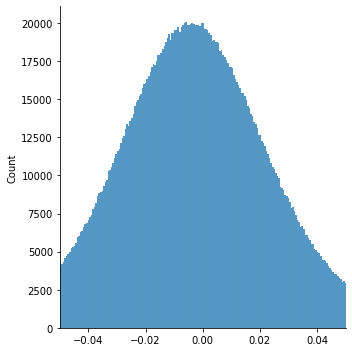

In [98]:
ax = sns.displot(all_params);
ax.set(xlim=(-0.05, 0.05))

In [99]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [100]:
(np.abs(all_params) <= 0.1).sum() / len(all_params)

0.9872147306266366

In [101]:
(np.abs(all_params) <= 0.01).sum() / len(all_params)

0.28680064037748565

In [102]:
(np.abs(all_params) <= 0.001).sum() / len(all_params)

0.029698073034144824

In [103]:
(np.abs(all_params) <= 0.0001).sum() / len(all_params)

0.002986375774545643

In [104]:
(np.abs(all_params) <= 0.00001).sum() / len(all_params)

0.0002997718493168443

In [105]:
(all_params <= 0.000001).sum() / len(all_params)

0.5514991833242592

In [106]:
np.isclose(all_params, 0, atol=1e-02).sum() / len(all_params)

0.28680064037748565